In [6]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6

In [8]:
data_path_o = Path('../data/raw/steel_energy_original.csv')
df_o = pd.read_csv(data_path_o)

data_path_m = Path('../data/raw/steel_energy_modified.csv')
df_m = pd.read_csv(data_path_m)

In [9]:
df_o.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [10]:
df_m.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,01/01/2018 00:15,3.17,2.95,0.0,NaN,73.21,100.0,900.0,Weekday,Monday,Light_Load,649
1,01/01/2018 00:30,4.0,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load,NaN
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load,696
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,Weekday,Monday,Light_Load,630
4,01/01/2018 01:15,3.82,4.5,0.0,0.0,64.72,100.0,4500.0,Weekday,Monday,Light_Load,325


In [11]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [12]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             35339 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  35339 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  35327 non-null  object
 4   CO2(tCO2)                             35370 non-null  object
 5   Lagging_Current_Power_Factor          35291 non-null  object
 6   Leading_Current_Power_Factor          35338 non-null  object
 7   NSM                                   35325 non-null  object
 8   WeekStatus                            35400 non-null  object
 9   Day_of_week                           35428 non-null  object
 10  Load_Type                             35432 non-null  object
 11  mixed_type_col              

In [13]:
# ============================================================================
# CELL 2: Data Preparation - Create Working Copy
# ============================================================================
# Create a copy of df_m for analysis
dfa = df_m.copy()

print("=" * 80)
print("DATA PREPARATION")
print("=" * 80)
print(f"\nOriginal shape: {dfa.shape}")
print(f"\nInitial data types:\n{dfa.dtypes}")
print(f"\nInitial null values:\n{dfa.isnull().sum()}")

DATA PREPARATION

Original shape: (35740, 12)

Initial data types:
date                                    object
Usage_kWh                               object
Lagging_Current_Reactive.Power_kVarh    object
Leading_Current_Reactive_Power_kVarh    object
CO2(tCO2)                               object
Lagging_Current_Power_Factor            object
Leading_Current_Power_Factor            object
NSM                                     object
WeekStatus                              object
Day_of_week                             object
Load_Type                               object
mixed_type_col                          object
dtype: object

Initial null values:
date                                     339
Usage_kWh                                401
Lagging_Current_Reactive.Power_kVarh     401
Leading_Current_Reactive_Power_kVarh     413
CO2(tCO2)                                370
Lagging_Current_Power_Factor             449
Leading_Current_Power_Factor             402
NSM               

In [14]:
# CELL 3: Data Type Conversion - Numeric Columns
# ============================================================================
print("\n" + "=" * 80)
print("CONVERTING OBJECT COLUMNS TO NUMERIC")
print("=" * 80)

# Define numeric columns to convert
numeric_columns = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

# Convert to numeric, coercing errors to NaN
for col in numeric_columns:
    if col in dfa.columns:
        dfa[col] = pd.to_numeric(dfa[col], errors='coerce')

# Convert NSM to integer (after handling NaNs)
if 'NSM' in dfa.columns:
    dfa['NSM'] = dfa['NSM'].fillna(0).astype('int64')

print("\nNumeric conversion completed.")
print(f"Data types after conversion:\n{dfa[numeric_columns].dtypes}")


CONVERTING OBJECT COLUMNS TO NUMERIC

Numeric conversion completed.
Data types after conversion:
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
dtype: object


In [15]:
# ============================================================================
# CELL 4: Remove Mixed Type Column
# ============================================================================
if 'mixed_type_col' in dfa.columns:
    dfa = dfa.drop('mixed_type_col', axis=1)
    print("\n'mixed_type_col' removed from dataframe")


'mixed_type_col' removed from dataframe


In [16]:
# ============================================================================
# CELL 5: Date Column Conversion
# ============================================================================
print("\n" + "=" * 80)
print("DATE COLUMN CONVERSION")
print("=" * 80)

# Convert date column to datetime
dfa['date'] = pd.to_datetime(dfa['date'], errors='coerce')

print(f"\nDate column converted to datetime")
print(f"Date range: {dfa['date'].min()} to {dfa['date'].max()}")
print(f"Total days: {(dfa['date'].max() - dfa['date'].min()).days}")


DATE COLUMN CONVERSION

Date column converted to datetime
Date range: 2018-01-01 00:00:00 to 2018-12-12 23:45:00
Total days: 345


In [ ]:
# ==================================================================================================
# CELL 6: Categorical Variables - Uppercase Conversion & Whitespace Removal (Checking all instances)
# ==================================================================================================
print("\n" + "=" * 80)
print("CATEGORICAL VARIABLES TRANSFORMATION")
print("=" * 80)

categorical_cols = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in categorical_cols:
    if col in dfa.columns:
        print(f"\n{col} - Unique values before cleaning: {dfa[col].unique()}")
        
        # Convert to uppercase and remove leading/trailing whitespaces
        dfa[col] = dfa[col].astype(str).str.upper().str.strip()
        
        print(f"{col} - Unique values after cleaning: {dfa[col].unique()}")


CATEGORICAL VARIABLES TRANSFORMATION

WeekStatus - Unique values before cleaning: ['Weekday' ' wEEKDAY ' nan 'Weekend' ' wEEKEND ' ' NAN ']
WeekStatus - Unique values after cleaning: ['WEEKDAY' 'NAN' 'WEEKEND']

Day_of_week - Unique values before cleaning: ['Monday' ' mONDAY ' ' tUESDAY ' 'Tuesday' 'Wednesday' ' wEDNESDAY '
 'Thursday' ' tHURSDAY ' 'Friday' ' fRIDAY ' 'Saturday' ' sATURDAY '
 'Sunday' ' sUNDAY ' nan ' NAN ']
Day_of_week - Unique values after cleaning: ['MONDAY' 'TUESDAY' 'WEDNESDAY' 'THURSDAY' 'FRIDAY' 'SATURDAY' 'SUNDAY'
 'NAN']

Load_Type - Unique values before cleaning: ['Light_Load' ' lIGHT_lOAD ' nan 'Medium_Load' 'Maximum_Load'
 ' mEDIUM_lOAD ' ' mAXIMUM_lOAD ' ' NAN ']
Load_Type - Unique values after cleaning: ['LIGHT_LOAD' 'NAN' 'MEDIUM_LOAD' 'MAXIMUM_LOAD']


In [18]:
# ============================================================================
# CELL 7: Handle NaN Values in Categorical Variables
# ============================================================================
print("\n" + "=" * 80)
print("HANDLING NaN VALUES IN CATEGORICAL VARIABLES")
print("=" * 80)

for col in categorical_cols:
    if col in dfa.columns:
        # Count initial NaN-like values
        initial_nan_count = dfa[col].isin(['NAN', 'NA', 'NONE', 'NULL', '']).sum() + dfa[col].isnull().sum()
        
        # Replace string 'NAN' variations and empty strings with actual NaN
        dfa[col] = dfa[col].replace(['NAN', 'NA', 'NONE', 'NULL', ''], np.nan)
        
        # Calculate mode (most frequent value) excluding NaN
        mode_series = dfa[col].mode()
        mode_value = mode_series[0] if len(mode_series) > 0 else 'UNKNOWN'
        
        # Count NaN values before replacement
        nan_count = dfa[col].isnull().sum()
        
        # Replace NaN with mode
        dfa[col] = dfa[col].fillna(mode_value)
        
        print(f"\n{col}:")
        print(f"  - Initial NaN-like values: {initial_nan_count}")
        print(f"  - NaN values replaced with mode: {nan_count}")
        print(f"  - Mode used for replacement: '{mode_value}'")
        print(f"  - Value counts after cleaning:\n{dfa[col].value_counts()}")
        print(f"  - Final unique values: {sorted(dfa[col].unique())}")


HANDLING NaN VALUES IN CATEGORICAL VARIABLES

WeekStatus:
  - Initial NaN-like values: 362
  - NaN values replaced with mode: 362
  - Mode used for replacement: 'WEEKDAY'
  - Value counts after cleaning:
WeekStatus
WEEKDAY    25657
WEEKEND    10083
Name: count, dtype: int64
  - Final unique values: ['WEEKDAY', 'WEEKEND']

Day_of_week:
  - Initial NaN-like values: 327
  - NaN values replaced with mode: 327
  - Mode used for replacement: 'MONDAY'
  - Value counts after cleaning:
Day_of_week
MONDAY       5470
FRIDAY       5056
SUNDAY       5052
TUESDAY      5047
WEDNESDAY    5042
SATURDAY     5040
THURSDAY     5033
Name: count, dtype: int64
  - Final unique values: ['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY']

Load_Type:
  - Initial NaN-like values: 328
  - NaN values replaced with mode: 328
  - Mode used for replacement: 'LIGHT_LOAD'
  - Value counts after cleaning:
Load_Type
LIGHT_LOAD      18607
MEDIUM_LOAD      9804
MAXIMUM_LOAD     7329
Name: count,

In [19]:
# ============================================================================
# CELL 8: Calculate Median of Usage_kWh by Load_Type
# ============================================================================
print("\n" + "=" * 80)
print("USAGE MEDIAN BY LOAD TYPE")
print("=" * 80)

# Calculate median Usage_kWh by Load_Type
usage_median_by_load = dfa.groupby('Load_Type')['Usage_kWh'].median()
print("\nMedian Usage_kWh by Load_Type:")
print(usage_median_by_load)



USAGE MEDIAN BY LOAD TYPE

Median Usage_kWh by Load_Type:
Load_Type
LIGHT_LOAD       3.31
MAXIMUM_LOAD    56.81
MEDIUM_LOAD     35.06
Name: Usage_kWh, dtype: float64


In [20]:
# ============================================================================
# CELL 9: Handle NaN in Usage_kWh with Load_Type Median
# ============================================================================
print("\n" + "=" * 80)
print("HANDLING NaN IN USAGE_kWh")
print("=" * 80)

# Count NaN values before replacement
nan_usage_count = dfa['Usage_kWh'].isnull().sum()
print(f"\nNaN values in Usage_kWh: {nan_usage_count}")

# Replace NaN with median based on Load_Type
def fill_usage_with_median(row):
    if pd.isna(row['Usage_kWh']):
        return usage_median_by_load.get(row['Load_Type'], dfa['Usage_kWh'].median())
    return row['Usage_kWh']

dfa['Usage_kWh'] = dfa.apply(fill_usage_with_median, axis=1)

print(f"NaN values after replacement: {dfa['Usage_kWh'].isnull().sum()}")


HANDLING NaN IN USAGE_kWh

NaN values in Usage_kWh: 516
NaN values after replacement: 0


In [21]:
# ============================================================================
# CELL 10: Handle NaN and Data Quality Rules for Numeric Columns
# ============================================================================
print("\n" + "=" * 80)
print("HANDLING NaN AND DATA QUALITY RULES FOR NUMERIC COLUMNS")
print("=" * 80)

other_numeric_cols = [col for col in numeric_columns if col != 'Usage_kWh']

# First, handle NaN values (excluding Usage_kWh which was handled in Cell 9)
for col in other_numeric_cols:
    if col in dfa.columns:
        nan_count = dfa[col].isnull().sum()
        if nan_count > 0:
            dfa[col] = dfa[col].fillna(0)
            print(f"\n{col}: {nan_count} NaN values replaced with 0")

# Apply data quality rules for specific columns
print("\n" + "=" * 80)
print("APPLYING DATA QUALITY RULES")
print("=" * 80)

# Rule 1: Leading_Current_Power_Factor - max = 100
if 'Leading_Current_Power_Factor' in dfa.columns:
    col = 'Leading_Current_Power_Factor'
    max_value = 100
    initial_violations = (dfa[col] > max_value).sum()
    
    # Divide by 100 if value > 100
    dfa.loc[dfa[col] > max_value, col] = dfa.loc[dfa[col] > max_value, col] / 100
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {max_value} before correction: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.4f}, {dfa[col].max():.4f}]")

# Rule 2: Lagging_Current_Power_Factor - max = 100
if 'Lagging_Current_Power_Factor' in dfa.columns:
    col = 'Lagging_Current_Power_Factor'
    max_value = 100
    initial_violations = (dfa[col] > max_value).sum()
    
    # Divide by 100 if value > 100
    dfa.loc[dfa[col] > max_value, col] = dfa.loc[dfa[col] > max_value, col] / 100
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {max_value} before correction: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.4f}, {dfa[col].max():.4f}]")

# Rule 3: CO2(tCO2) - max = 0.02
if 'CO2(tCO2)' in dfa.columns:
    col = 'CO2(tCO2)'
    max_value = 0.02
    threshold = 0.2
    initial_violations = (dfa[col] > threshold).sum()
    
    # Divide by 100000 if value > 0.2
    dfa.loc[dfa[col] > threshold, col] = dfa.loc[dfa[col] > threshold, col] / 100000
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {threshold} corrected by dividing by 100000: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.6f}, {dfa[col].max():.6f}]")

# Rule 4: Lagging_Current_Reactive.Power_kVarh - max = 96.91
if 'Lagging_Current_Reactive.Power_kVarh' in dfa.columns:
    col = 'Lagging_Current_Reactive.Power_kVarh'
    max_value = 96.91
    threshold = 100
    initial_violations = (dfa[col] > threshold).sum()
    
    # Divide by 100 if value > 100
    dfa.loc[dfa[col] > threshold, col] = dfa.loc[dfa[col] > threshold, col] / 100
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {threshold} corrected by dividing by 100: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.4f}, {dfa[col].max():.4f}]")

# Rule 5: Leading_Current_Reactive_Power_kVarh - max = 27.76
if 'Leading_Current_Reactive_Power_kVarh' in dfa.columns:
    col = 'Leading_Current_Reactive_Power_kVarh'
    max_value = 27.76
    initial_violations = (dfa[col] > max_value).sum()
    
    # Divide by 1000 for values that need correction
    dfa.loc[dfa[col] > max_value, col] = dfa.loc[dfa[col] > max_value, col] / 1000
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {max_value} corrected by dividing by 1000: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.4f}, {dfa[col].max():.4f}]")

# Rule 6: NSM - max = 85500
if 'NSM' in dfa.columns:
    col = 'NSM'
    max_value = 85500
    initial_violations = (dfa[col] > max_value).sum()
    
    # Divide by 100 if value > 85500
    dfa.loc[dfa[col] > max_value, col] = dfa.loc[dfa[col] > max_value, col] / 100
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    # Convert back to integer
    dfa[col] = dfa[col].astype('int64')
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col}:")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {max_value} corrected by dividing by 100: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min()}, {dfa[col].max()}]")

# Rule 7: Usage_kWh (Dependent Variable) - max = 157.18
if 'Usage_kWh' in dfa.columns:
    col = 'Usage_kWh'
    max_value = 157.18
    initial_violations = (dfa[col] > max_value).sum()
    
    # Divide by 1000 if value > 157.18
    dfa.loc[dfa[col] > max_value, col] = dfa.loc[dfa[col] > max_value, col] / 1000
    
    # If still greater than max, replace with max
    dfa.loc[dfa[col] > max_value, col] = max_value
    
    final_violations = (dfa[col] > max_value).sum()
    print(f"\n{col} (DEPENDENT VARIABLE):")
    print(f"  - Max allowed: {max_value}")
    print(f"  - Values > {max_value} corrected by dividing by 1000: {initial_violations}")
    print(f"  - Values > {max_value} after correction: {final_violations}")
    print(f"  - Current range: [{dfa[col].min():.4f}, {dfa[col].max():.4f}]")

print("\n" + "=" * 80)
print("DATA QUALITY RULES APPLIED SUCCESSFULLY")
print("=" * 80)


HANDLING NaN AND DATA QUALITY RULES FOR NUMERIC COLUMNS

Lagging_Current_Reactive.Power_kVarh: 530 NaN values replaced with 0

Leading_Current_Reactive_Power_kVarh: 554 NaN values replaced with 0

CO2(tCO2): 510 NaN values replaced with 0

Lagging_Current_Power_Factor: 572 NaN values replaced with 0

Leading_Current_Power_Factor: 526 NaN values replaced with 0

APPLYING DATA QUALITY RULES

Leading_Current_Power_Factor:
  - Max allowed: 100
  - Values > 100 before correction: 360
  - Values > 100 after correction: 0
  - Current range: [0.0000, 100.0000]

Lagging_Current_Power_Factor:
  - Max allowed: 100
  - Values > 100 before correction: 343
  - Values > 100 after correction: 0
  - Current range: [0.0000, 100.0000]

CO2(tCO2):
  - Max allowed: 0.02
  - Values > 0.2 corrected by dividing by 100000: 237
  - Values > 0.02 after correction: 0
  - Current range: [0.000000, 0.020000]

Lagging_Current_Reactive.Power_kVarh:
  - Max allowed: 96.91
  - Values > 100 corrected by dividing by 100

In [22]:
# ============================================================================
# CELL 11: Final Data Summary
# ============================================================================
print("\n" + "=" * 80)
print("FINAL DATA SUMMARY")
print("=" * 80)

print(f"\nFinal shape: {dfa.shape}")
print(f"\nData types:\n{dfa.dtypes}")
print(f"\nNull values:\n{dfa.isnull().sum()}")
print(f"\nFirst rows:\n{dfa.head()}")



FINAL DATA SUMMARY

Final shape: (35740, 11)

Data types:
date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

Null values:
date                                    22467
Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2(tCO2)                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor    

In [23]:
# ============================================================================
# CELL 12: Descriptive Statistics - Numeric Variables
# ============================================================================
print("\n" + "=" * 80)
print("DESCRIPTIVE STATISTICS - NUMERIC VARIABLES")
print("=" * 80)

numeric_stats = dfa.describe().T
print("\n", numeric_stats)

# Additional statistics for Usage_kWh (Dependent Variable)
print("\n" + "-" * 80)
print("DETAILED STATISTICS - USAGE_kWh (Dependent Variable)")
print("-" * 80)
print(f"Mean: {dfa['Usage_kWh'].mean():.2f}")
print(f"Median: {dfa['Usage_kWh'].median():.2f}")
print(f"Std Dev: {dfa['Usage_kWh'].std():.2f}")
print(f"Skewness: {dfa['Usage_kWh'].skew():.2f}")
print(f"Kurtosis: {dfa['Usage_kWh'].kurtosis():.2f}")
print(f"Min: {dfa['Usage_kWh'].min():.2f}")
print(f"Max: {dfa['Usage_kWh'].max():.2f}")
print(f"Range: {dfa['Usage_kWh'].max() - dfa['Usage_kWh'].min():.2f}")


DESCRIPTIVE STATISTICS - NUMERIC VARIABLES

                                         count                           mean  \
date                                    13273  2018-06-22 07:51:05.682212096   
Usage_kWh                             35740.0                       27.08759   
Lagging_Current_Reactive.Power_kVarh  35740.0                      12.790477   
Leading_Current_Reactive_Power_kVarh  35740.0                       3.789461   
CO2(tCO2)                             35740.0                       0.007423   
Lagging_Current_Power_Factor          35740.0                      78.732832   
Leading_Current_Power_Factor          35740.0                      82.470346   
NSM                                   35740.0                   42014.901175   

                                                      min  \
date                                  2018-01-01 00:00:00   
Usage_kWh                                             0.0   
Lagging_Current_Reactive.Power_kVarh              

In [24]:
# ============================================================================
# CELL 13: Categorical Variables Analysis
# ============================================================================
print("\n" + "=" * 80)
print("CATEGORICAL VARIABLES ANALYSIS (Independent Variables)")
print("=" * 80)

categorical_stats = dfa.describe(include='object').T
print("\n", categorical_stats)

for col in categorical_cols:
    if col in dfa.columns:
        print(f"\n{col}:")
        print(f"  - Unique values: {dfa[col].nunique()}")
        print(f"  - Value counts:\n{dfa[col].value_counts()}")
        print(f"  - Percentage distribution:\n{dfa[col].value_counts(normalize=True) * 100}")


CATEGORICAL VARIABLES ANALYSIS (Independent Variables)

              count unique         top   freq
WeekStatus   35740      2     WEEKDAY  25657
Day_of_week  35740      7      MONDAY   5470
Load_Type    35740      3  LIGHT_LOAD  18607

WeekStatus:
  - Unique values: 2
  - Value counts:
WeekStatus
WEEKDAY    25657
WEEKEND    10083
Name: count, dtype: int64
  - Percentage distribution:
WeekStatus
WEEKDAY    71.787913
WEEKEND    28.212087
Name: proportion, dtype: float64

Day_of_week:
  - Unique values: 7
  - Value counts:
Day_of_week
MONDAY       5470
FRIDAY       5056
SUNDAY       5052
TUESDAY      5047
WEDNESDAY    5042
SATURDAY     5040
THURSDAY     5033
Name: count, dtype: int64
  - Percentage distribution:
Day_of_week
MONDAY       15.304980
FRIDAY       14.146614
SUNDAY       14.135422
TUESDAY      14.121433
WEDNESDAY    14.107443
SATURDAY     14.101847
THURSDAY     14.082261
Name: proportion, dtype: float64

Load_Type:
  - Unique values: 3
  - Value counts:
Load_Type
LIGHT_LOAD 

In [25]:
# ============================================================================
# CELL 13A: PROCCESSED DATAFRAME BACKUP
# ============================================================================

output_dir = Path('../data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

file_path = output_dir / 'steel_energy_processed.csv'

dfa.to_csv(file_path, index=False)

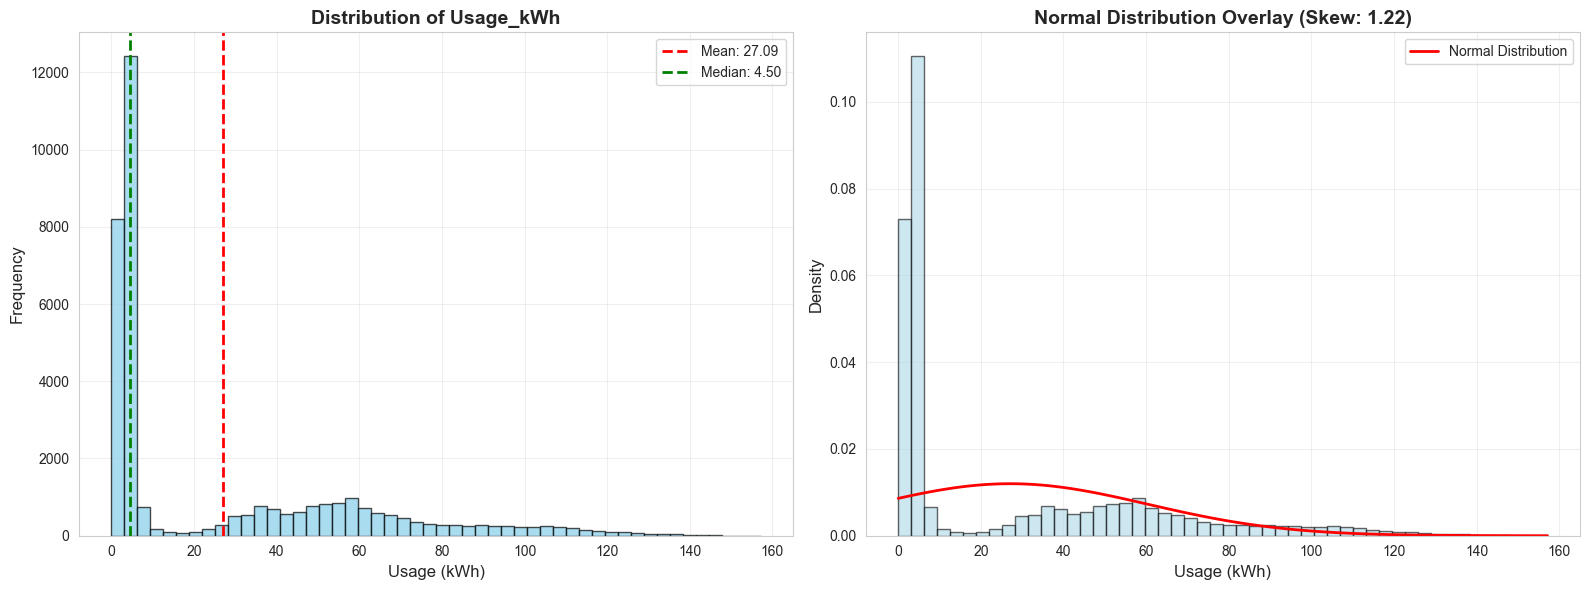

In [26]:
# ============================================================================
# CELL 14: Visualization - Distribution of Usage_kWh (Histogram)
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(dfa['Usage_kWh'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(dfa['Usage_kWh'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {dfa["Usage_kWh"].mean():.2f}')
axes[0].axvline(dfa['Usage_kWh'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {dfa["Usage_kWh"].median():.2f}')
axes[0].set_xlabel('Usage (kWh)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Usage_kWh', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Normal Distribution with Skew
mu, sigma = dfa['Usage_kWh'].mean(), dfa['Usage_kWh'].std()
x = np.linspace(dfa['Usage_kWh'].min(), dfa['Usage_kWh'].max(), 100)
axes[1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
axes[1].hist(dfa['Usage_kWh'].dropna(), bins=50, density=True, color='lightblue', alpha=0.6, edgecolor='black')
axes[1].set_xlabel('Usage (kWh)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title(f'Normal Distribution Overlay (Skew: {dfa["Usage_kWh"].skew():.2f})', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

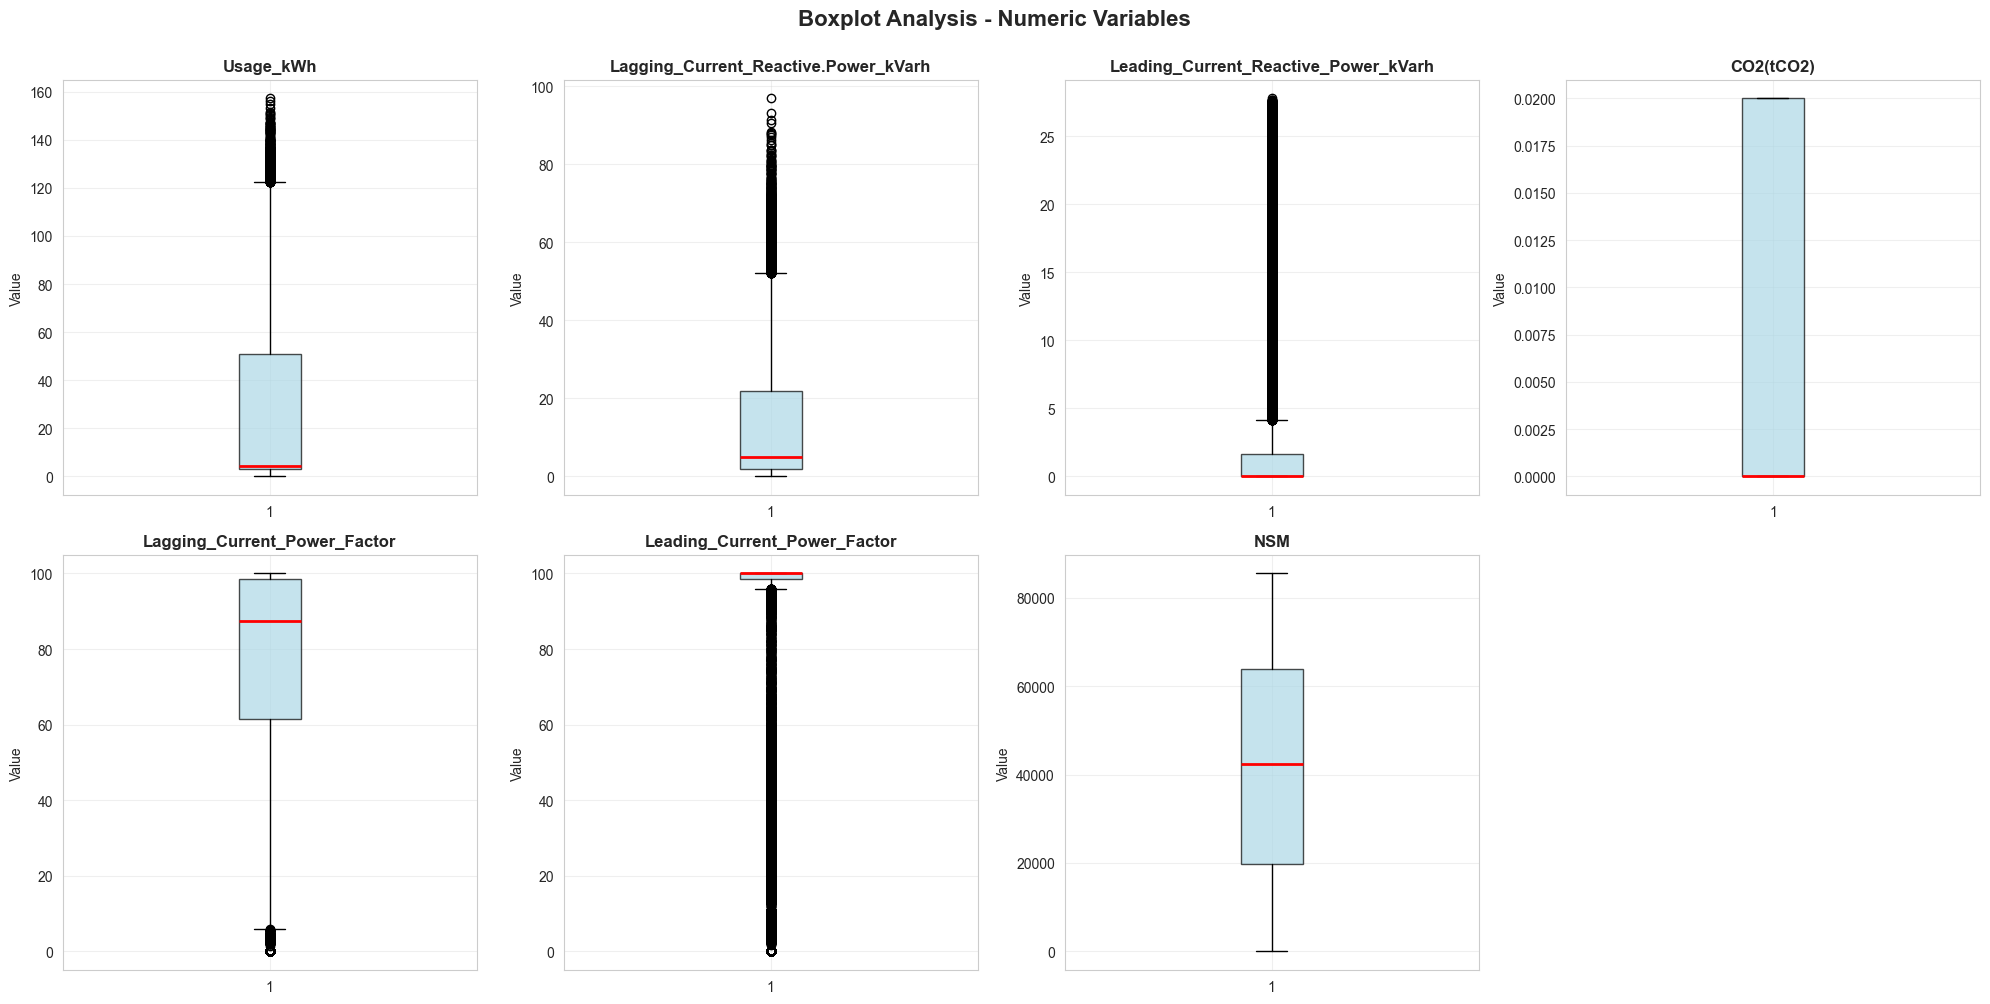

In [27]:
# ============================================================================
# CELL 15: Visualization - Boxplot for Numeric Variables
# ============================================================================
# Select numeric columns for boxplot
numeric_cols_for_viz = [col for col in numeric_columns if col in dfa.columns]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols_for_viz):
    if idx < len(axes):
        axes[idx].boxplot(dfa[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(col, fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(numeric_cols_for_viz), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Boxplot Analysis - Numeric Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

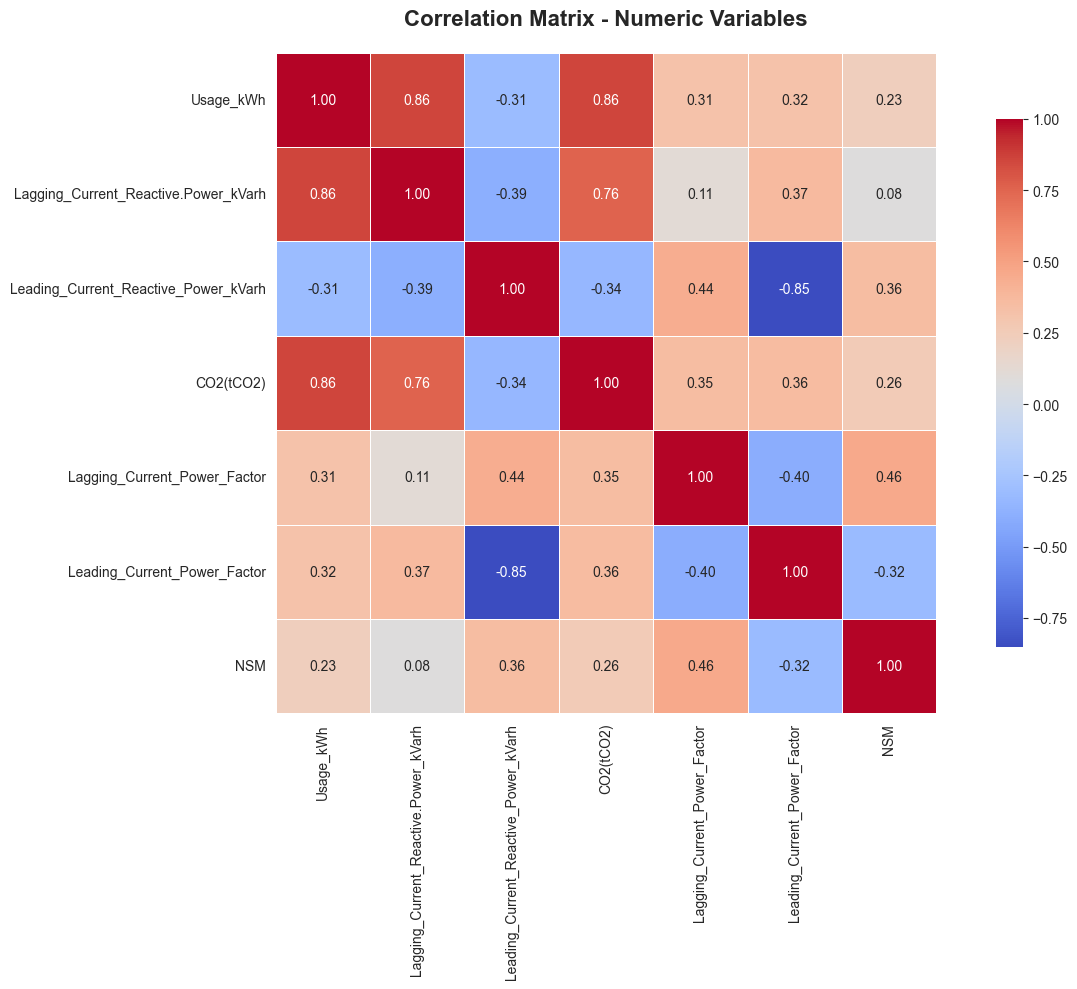


Strong Correlations (|r| > 0.5) with Usage_kWh:
Usage_kWh                               1.000000
Lagging_Current_Reactive.Power_kVarh    0.858146
CO2(tCO2)                               0.857320
Name: Usage_kWh, dtype: float64


In [28]:
# ============================================================================
# CELL 16: Visualization - Correlation Matrix
# ============================================================================
# Calculate correlation matrix
correlation_matrix = dfa[numeric_cols_for_viz].corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.5) with Usage_kWh:")
usage_corr = correlation_matrix['Usage_kWh'].abs().sort_values(ascending=False)
print(usage_corr[usage_corr > 0.5])


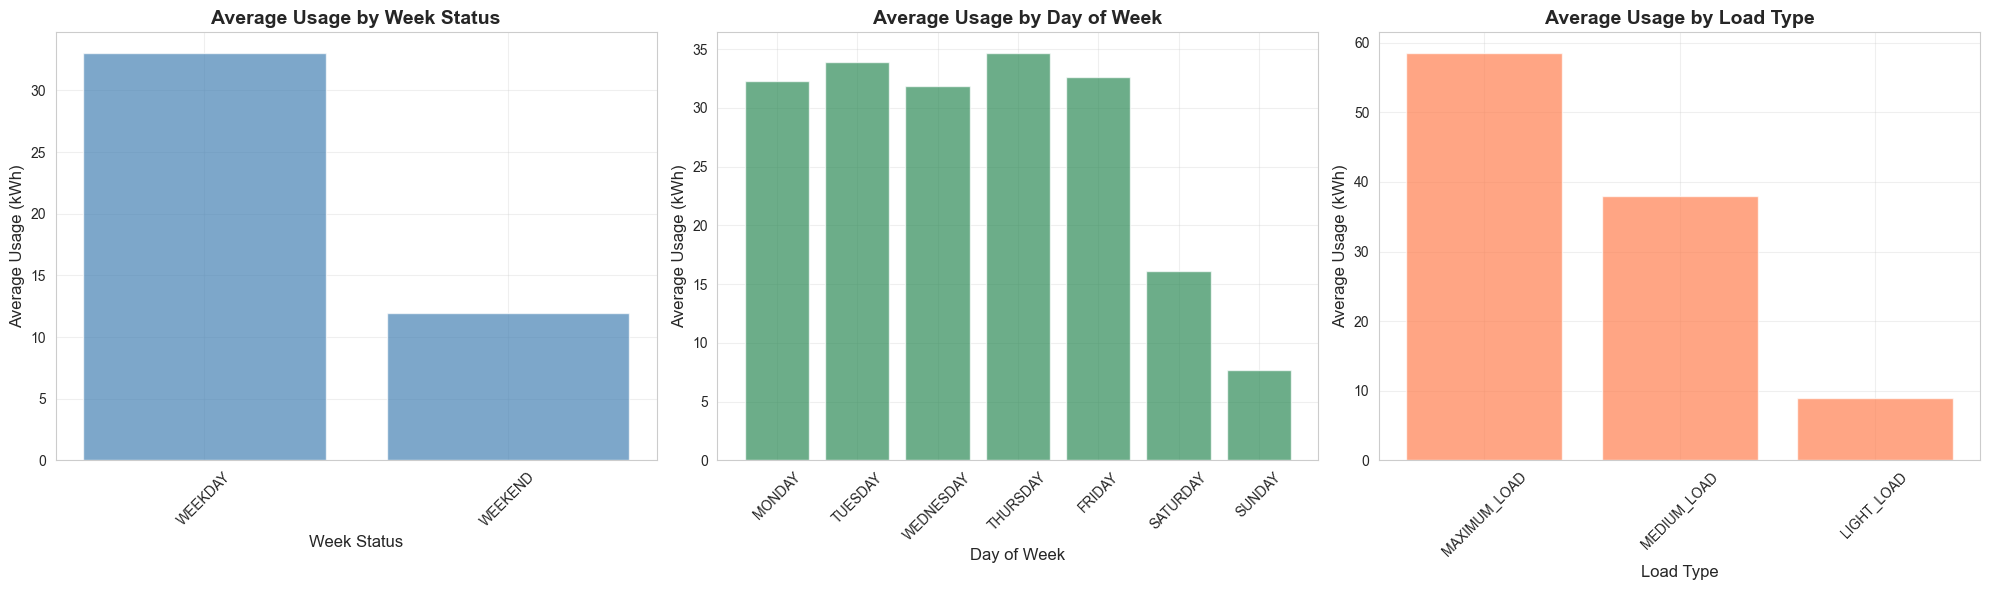

In [29]:
# ============================================================================
# CELL 17: Visualization - Usage_kWh by Categorical Variables (Bar Plots)
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# WeekStatus
if 'WeekStatus' in dfa.columns:
    usage_by_weekstatus = dfa.groupby('WeekStatus')['Usage_kWh'].mean().sort_values(ascending=False)
    axes[0].bar(usage_by_weekstatus.index, usage_by_weekstatus.values, color='steelblue', alpha=0.7)
    axes[0].set_xlabel('Week Status', fontsize=12)
    axes[0].set_ylabel('Average Usage (kWh)', fontsize=12)
    axes[0].set_title('Average Usage by Week Status', fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)

# Day_of_week
if 'Day_of_week' in dfa.columns:
    usage_by_day = dfa.groupby('Day_of_week')['Usage_kWh'].mean()
    day_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    usage_by_day = usage_by_day.reindex([day for day in day_order if day in usage_by_day.index])
    axes[1].bar(usage_by_day.index, usage_by_day.values, color='seagreen', alpha=0.7)
    axes[1].set_xlabel('Day of Week', fontsize=12)
    axes[1].set_ylabel('Average Usage (kWh)', fontsize=12)
    axes[1].set_title('Average Usage by Day of Week', fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)

# Load_Type
if 'Load_Type' in dfa.columns:
    usage_by_load = dfa.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending=False)
    axes[2].bar(usage_by_load.index, usage_by_load.values, color='coral', alpha=0.7)
    axes[2].set_xlabel('Load Type', fontsize=12)
    axes[2].set_ylabel('Average Usage (kWh)', fontsize=12)
    axes[2].set_title('Average Usage by Load Type', fontsize=14, fontweight='bold')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

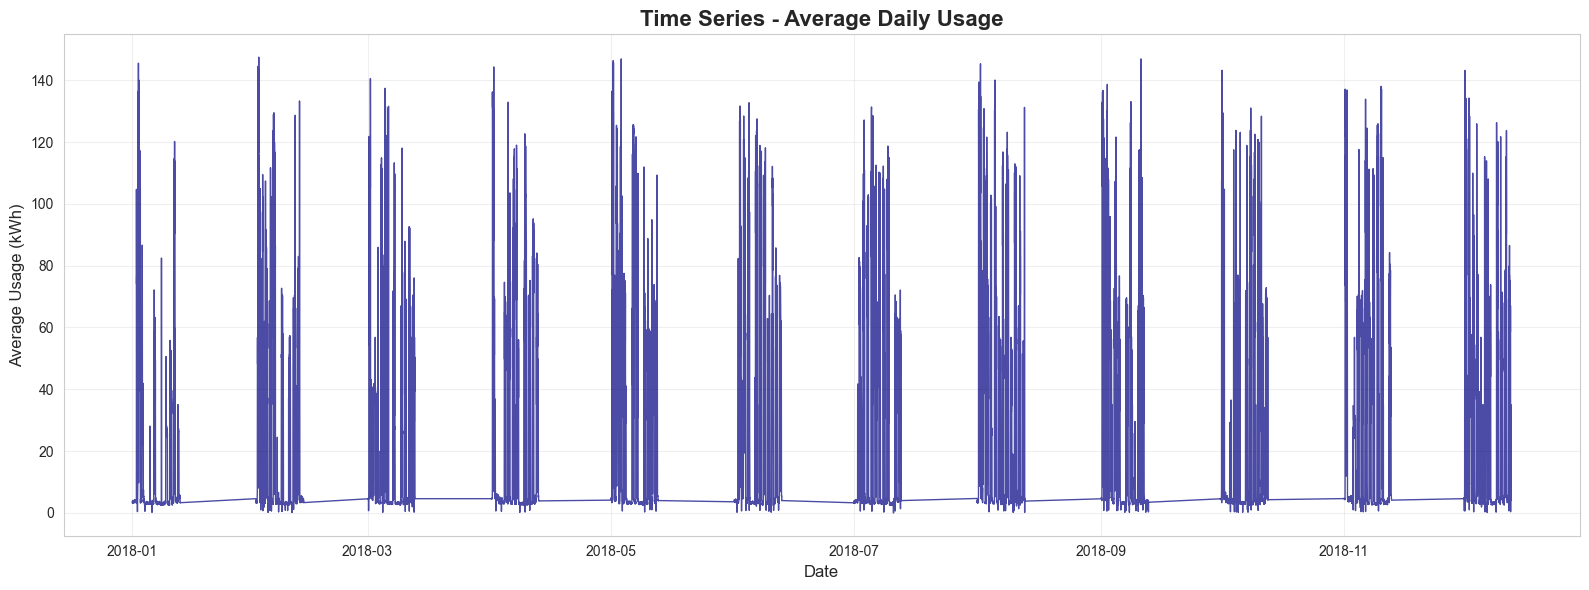

In [30]:
# ============================================================================
# CELL 18: Time Series Analysis - Usage Over Time
# ============================================================================
if 'date' in dfa.columns:
    # Group by date and calculate daily average
    daily_usage = dfa.groupby('date')['Usage_kWh'].mean().sort_index()
    
    plt.figure(figsize=(16, 6))
    plt.plot(daily_usage.index, daily_usage.values, color='navy', linewidth=1, alpha=0.7)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Usage (kWh)', fontsize=12)
    plt.title('Time Series - Average Daily Usage', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [31]:
# ============================================================================
# CELL 19: Outlier Analysis - Usage_kWh
# ============================================================================
print("\n" + "=" * 80)
print("OUTLIER ANALYSIS - USAGE_kWh")
print("=" * 80)

# Calculate IQR
Q1 = dfa['Usage_kWh'].quantile(0.25)
Q3 = dfa['Usage_kWh'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dfa[(dfa['Usage_kWh'] < lower_bound) | (dfa['Usage_kWh'] > upper_bound)]

print(f"\nIQR Method:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(dfa)*100:.2f}%)")

# Z-score method
z_scores = np.abs(stats.zscore(dfa['Usage_kWh'].dropna()))
outliers_zscore = len(z_scores[z_scores > 3])
print(f"\nZ-Score Method (>3):")
print(f"Number of outliers: {outliers_zscore} ({outliers_zscore/len(dfa)*100:.2f}%)")


OUTLIER ANALYSIS - USAGE_kWh

IQR Method:
Q1 (25%): 3.20
Q3 (75%): 50.83
IQR: 47.63
Lower Bound: -68.24
Upper Bound: 122.27
Number of outliers: 380 (1.06%)

Z-Score Method (>3):
Number of outliers: 246 (0.69%)


In [32]:
# ============================================================================
# CELL 20: Final Summary Report
# ============================================================================
print("\n" + "=" * 80)
print("EDA SUMMARY REPORT")
print("=" * 80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(dfa):,}")
print(f"   - Total features: {len(dfa.columns)}")
print(f"   - Numeric features: {len(numeric_cols_for_viz)}")
print(f"   - Categorical features: {len(categorical_cols)}")
print(f"   - Date range: {dfa['date'].min()} to {dfa['date'].max()}")

print(f"\n2. DEPENDENT VARIABLE (Usage_kWh):")
print(f"   - Mean: {dfa['Usage_kWh'].mean():.2f} kWh")
print(f"   - Median: {dfa['Usage_kWh'].median():.2f} kWh")
print(f"   - Std Dev: {dfa['Usage_kWh'].std():.2f} kWh")
print(f"   - Skewness: {dfa['Usage_kWh'].skew():.2f}")
print(f"   - Outliers (IQR): {len(outliers)} ({len(outliers)/len(dfa)*100:.2f}%)")

print(f"\n3. INDEPENDENT VARIABLES:")
for col in categorical_cols:
    if col in dfa.columns:
        print(f"   - {col}: {dfa[col].nunique()} unique values")

print(f"\n4. DATA QUALITY:")
print(f"   - Missing values: {dfa.isnull().sum().sum()}")
print(f"   - Duplicate rows: {dfa.duplicated().sum()}")

print(f"\n5. KEY INSIGHTS:")
print(f"   - Strongest correlations with Usage_kWh:")
for idx, val in usage_corr[1:4].items():
    print(f"     • {idx}: {val:.3f}")

print("\n" + "=" * 80)
print("EDA COMPLETED SUCCESSFULLY")
print("=" * 80)
print("\nNext Steps:")
print("1. Feature engineering based on correlations and patterns")
print("2. Handle outliers if necessary for model performance")
print("3. Encode categorical variables for ML model")
print("4. Split data into train/test sets")
print("5. Build and validate forecasting model")


EDA SUMMARY REPORT

1. DATASET OVERVIEW:
   - Total records: 35,740
   - Total features: 11
   - Numeric features: 7
   - Categorical features: 3
   - Date range: 2018-01-01 00:00:00 to 2018-12-12 23:45:00

2. DEPENDENT VARIABLE (Usage_kWh):
   - Mean: 27.09 kWh
   - Median: 4.50 kWh
   - Std Dev: 33.28 kWh
   - Skewness: 1.22
   - Outliers (IQR): 380 (1.06%)

3. INDEPENDENT VARIABLES:
   - WeekStatus: 2 unique values
   - Day_of_week: 7 unique values
   - Load_Type: 3 unique values

4. DATA QUALITY:
   - Missing values: 22467
   - Duplicate rows: 500

5. KEY INSIGHTS:
   - Strongest correlations with Usage_kWh:
     • Lagging_Current_Reactive.Power_kVarh: 0.858
     • CO2(tCO2): 0.857
     • Leading_Current_Power_Factor: 0.318

EDA COMPLETED SUCCESSFULLY

Next Steps:
1. Feature engineering based on correlations and patterns
2. Handle outliers if necessary for model performance
3. Encode categorical variables for ML model
4. Split data into train/test sets
5. Build and validate foreca